:label:`sec_weight_decay`

Overfitting은 더 많은 training data를 통해 해결될 수 있지만, 해결 방법이 효율적이지 못하고 시간도 오래 걸림. 그러므로 지금부터는 regularization 하는 방법에 대해 알아볼 예정이다.

Section 4.4의 polynomial regression example에서는 우리 모델의 가능성(수용성)을 단순히 차수를 바꾸는 것(실제로 대중적인 방법이다)으로 제한할 수 있었다.


하지만, features의 경우도 고려해야 하는게 polynomial regression 예시에서 고차원의 input값이 들어왔을 때의 경우를 예를 들자면, features를 단순히 방치하는 게(값을 조정하지 않는 게) 좋은 방법은 아님


다변수 데이터를 다루기 위해 다항식을 단항식으로 확장함. 여기서의 다항식과 단항식의 의미는 다항식은 $x^{2}+2x+1$과 같은 형태였다면, 단항식은 변수들의 n제곱들의 곱으로, ${x_{1}}^{2}x_{2}$ 와 같은 형태를 이야기함.

차수 d가 커질수록 항의 개수가 기하급수적으로 커짐에 유의하자. k개의 변수가 있다고 할 때, d차 단항식의 개수는 ${k - 1 + d} \choose {k - 1}$이다.

Multichoose
https://mathworld.wolfram.com/Multichoose.html

# 4.5.1 Norms and Weight Decay

We have described
both the $L_2$ norm and the $L_1$ norm,
which are special cases of the more general $L_p$ norm
in :numref:`subsec_lin-algebra-norms`.
(***Weight decay* (commonly called $L_2$ regularization),
might be the most widely-used technique
for regularizing parametric machine learning models.**)


함수는 $f = 0$ (모든 input에 0 넣을시)이 제일 간단하다라는 직관에서 출발함. 즉 0이라는 기준이 있고, 이 제일 '간단함'을 기준으로 함수의 복잡성을 측정한다는 아이디어에 착안할 수 있음

문제는 '어떻게' f와 f=0의 격차를 '정확하게' 측정하냐인데, 정해진 답은 없음.

바나흐 공간 이론과 함수적 분석 파트를 담당하는 수학의 분류들이 이 문제를 해결하고 있다고는 함. 즉 아직 정답이 나온 것은 아니라는 의미로도 해석된다.

[**The $L_2$ *norm* of $\mathbf{x}$ is the square root of the sum of the squares of the vector elements:**] in Section 2.3.10

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**)

선형함수
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$의 복잡성을 측정하는 가장 쉬운 수단은 $\| \mathbf{w} \|^2$와 같은 weight vector의 norm이라 할 수 있음

작은 weight vector를 보장하는 가장 대중적인 방법은 loss에 w의 norm을 더해서 penalty를 주는 방법이다. 이 방법을 사용하면 우리의 training labels에 대한 prediction loss를 최소화 한다는 초기의 목적이 prediction loss와 penalty term의 합을 최소화한다는 목적으로 변경된다.

Section 3.1의 linear regression에 대해 loss는

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

와 같이 주어지는데, 모든 data examples i에 대해 $x^{(i)}$는 features, $y^{(i)}$는 labels, ($w$,b)는 weight와 bias parameters임을 기억하자.

weight vector의 크기에 대한 페널티를 부여하기 위해, 상수 $\lambda$를 이용하여 w의 norm을 식에 추가한다.

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

- $\lambda = 0$이면 원래의 loss function을 가진다.
- $\lambda > 0$이면 $\| \mathbf{w} \|$.의 크기를 제한한다.

loss에 대해 derivative를 구하는 경우가 많으므로 계산의 편의를 위해(앞서 Chapter 2에서 mean squared error 앞에 1/2가 붙었던 것과 같은 맥락) $\frac{1}{2}$을 적용한다.
여기서 왜 standard norm($L_{n}$)이 아니라 qudratic을 가지고 공식을 만드는지 궁금할 수 있는데, 이 또한 컴퓨터 계산의 편의성을 위해서이다. $L_{2}$를 제곱하는 것으로 제곱근을 지우고, 각 weight vector의 요소들의 제곱의 합으로 나타낼 수 있게 해서, penalty의 derivative를 계산하기 용이하게 하기 위해서인 것이다.


왜 $L_1$ norm이 아닌 $L_2$ norm을 사용하는지 궁금할 수도 있는데, $L_1$ norm의 선택도 유효하고, 통계학적으로 대중적인 방법이다. $L_2$-regularized linear model들을 묶어 the classic *ridge regression* 알고리즘이라고 하고, $L_1$-regularized linear model들이 모여 *lasso regression*이라는, 통계학 모델들 중의 근간을 이룬다.


$L_2$ norm을 사용하는 한 가지 이유는 weight vector의 크기에 대해 상당한 양의 페널티(outsize penalty)를 부여하기 때문이다. 이 특징이 알고리즘으로 하여금 많은 양의 features 안에서 가중치를 고르게 분배하는 경향을 가지도록 한다. 이로 인해 단일 변수의 측정 에러에 있어 버틸 수 있게 해준다(make them more robust). 

이와 반대로 $L_1$ 페널티는 모델들이 몇몇 개의 작은 features를 제외한 나머지 weights를 0으로 설정하는, 가중치(weights)의 집중을 불러일으키는데, 이를 feature selection이라 하며, 다른 방향의 사용을 가진다.(desirable for other reasons)


3.1.10의 notation을 사용해서, minibatch stochastic gradient descent(경사하강법) 또한 $L_2$-regularized regression 사용시 갱신된다.

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

이전과 같이 $\mathbf{w}$를 측정치와 실값의 차이만큼 갱신하려는 것은 같지만, $\mathbf{w}$를 0의 방향으로 감쇠시키고자 한다. penalty term만 봤을 때는 매 training마다 최적화 알고리즘이 weight를 감소(decay, 부패, 퇴색 등으로도 해석)시키려 할 것이기 때문에 이 방법의 이름이 "weight decay"라고 한다.

feature selection과 다르게 weight decay는 함수의 복잡성을 조정하는 지속적인 메커니즘을 제공한다. $\lambda$가 작을수록 $\mathbf{w}$가 조정되지 않고 자연스러운 반면에, $\lambda$가 클수록 $\mathbf{w}$가 상당히 제약을 받는다.

 
우리가 편향 페널티 $b^{2}$을 넣을지의 여부는 실행에 따라 다르고, 신경망의 layer에 따라 다를 수 있다. network output layer에는 종종 bias term을 regularize하지 않는다.

# 4.5.2 High-Dimensional Linear Regression


In [11]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

[**generate some data as before**]

(**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**)

label은 input에 대한 linear function의 값과 corruption 값인 Gaussian noise($\sim \mathcal{N}(0, 0.01^2)$)의 합으로 정함.

overfitting의 결과값을 만들기 위해, 차수 d=200으로, example의 수는 20으로 정함.

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

# 4.5.3 Implementation from Scratch

squared $L_2$ penalty 를 원래의 target function에 추가하는 방법으로 weight decay를 구현할 생각임.

## 4.5.3.1 Initializing Model Parameters

model prarmeter를 무작위로 초기화할 함수 정의


In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

# 4.5.3.2 Defining $L_{2}$ Norm Penalty

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

## 4.5.3.3 Defining the Training Loop

The linear network and the squared loss는 Section 3의 내용과 변한 것이 없기 때문에 `d2l.linreg` and `d2l.squared_loss`를 사용하여 쉽게 import할 계획이다.
여기서의 유일한 차이점은 이제 loss가 penalty term을 포함한다는 점이다.

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

## 4.5.3.4 Training without Regularization

L2 norm of w: 14.436137199401855


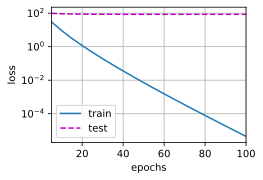

In [6]:
#disabled weight decay
train(lambd=0)

## 4.5.3.5 Using Weight Decay

L2 norm of w: 0.36313486099243164


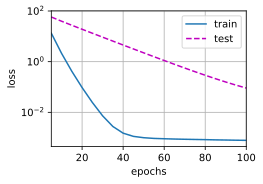

In [7]:
train(lambd=3)

# 4.5.4 Concise Implementation

framework에 있는 기능을 사용해서 만들어보자!

코드에서는 weight decay hyperparameter를 weight_decay라는 이름으로 만들었지만, 기본적으로 pytorch에서는 weights와 biases에다 동시에 decay 작업을 해준다. 아래의 코드에서는 weight를 위해 weight_decay만 설정했으니, bias parameter b는 decay 작업이 이루어지지 않는다.

In [8]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 13.350699424743652


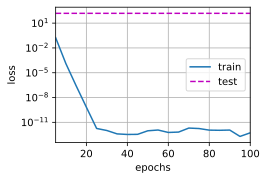

In [9]:
train_concise(0)

L2 norm of w: 0.38884851336479187


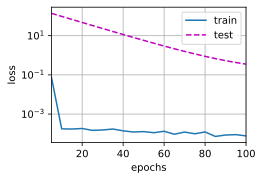

In [10]:
train_concise(3)

선형 함수를 이루는 개념에 대해 살펴보았지만, 단순 비선형 함수의 구성은 더 복잡한데, [reproducing kernel Hilbert space (RKHS)](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
는 linear functions를 nonlinear context에 사용할 수 있게 해주는 하나의 방법이다. 하지만 RKHS 기반의 알고리즘들은 큰 고차원 데이터들에 대해 성적이 좋지 않다(scale poorly to large, high-dimensional data). 이 책에서는 모든 층의 deep network에 weight decay를 적용하는 것을 기본으로 하겠다.